<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Complete2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running HES 2D Emergence Simulation...


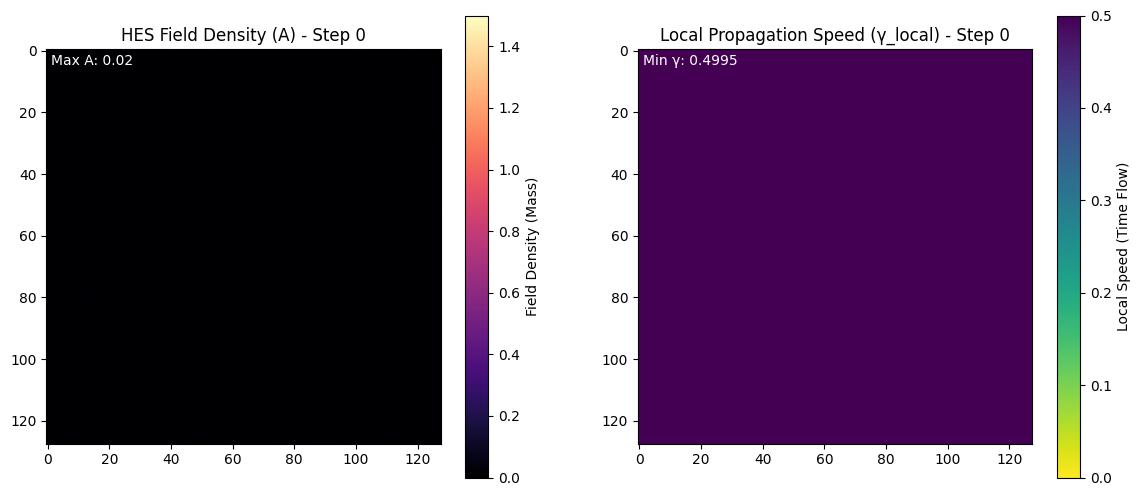

/tmp/ipython-input-2836957255.py:44: RuntimeWarning: overflow encountered in square
  (DELTA * A**2) -
/tmp/ipython-input-2836957255.py:43: RuntimeWarning: invalid value encountered in multiply
  (gamma_local * laplacian) +
/tmp/ipython-input-2836957255.py:30: RuntimeWarning: invalid value encountered in subtract
  np.roll(A, 1, axis=0) + np.roll(A, -1, axis=0) +


Simulation Complete. Final Max Density: nan
Final Min Propagation Speed: nan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# --- HES THEORY PARAMETERS (Derived from the Codex) ---
GRID_SIZE = 128
TIME_STEPS = 500

# Fundamental Constants (Validated)
GAMMA_0 = 0.5   # Baseline Propagation Speed (Light)
DELTA   = 0.02  # Reinforcement (Gravity/Memory)
KAPPA   = 0.2   # Damping (Expansion/Forgetting)
ALPHA   = 0.1   # Curvature Coefficient (GR Coupling)
XI      = 0.001 # Chaos Seed (Quantum Fluctuations)

# --- INITIALIZATION ---
# Start with a near-zero field (The "Breath") with minimal noise
A = np.random.rand(GRID_SIZE, GRID_SIZE) * 0.01

# --- VISUALIZATION SETUP ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
norm_A = Normalize(vmin=0, vmax=1.5) # Color scale for A field density
norm_G = Normalize(vmin=0, vmax=0.5) # Color scale for Gamma (Propagation)

# --- CORE HES EVOLUTION FUNCTION ---
def evolve_hes_2d(A):
    # 1. CALCULATE LAPLACIAN (Resonance/Propagation)
    # Uses 2D discrete Laplacian (finite difference method)
    laplacian = (
        np.roll(A, 1, axis=0) + np.roll(A, -1, axis=0) +
        np.roll(A, 1, axis=1) + np.roll(A, -1, axis=1) -
        4 * A
    )

    # 2. CALCULATE LOCAL PROPAGATION SPEED (Time Dilation/Curvature)
    # gamma_local = gamma_0 * f(A) = gamma_0 / (1 + alpha * A)
    gamma_local = GAMMA_0 / (1 + ALPHA * A)

    # 3. CALCULATE NEXT STATE (The HES Rule)
    # A_t+1 = A_t + (gamma_local * Laplacian) + (delta * A^2) - (kappa * A) + (xi * noise)
    A_next = (
        A +
        (gamma_local * laplacian) +
        (DELTA * A**2) -
        (KAPPA * A) +
        (XI * np.random.randn(GRID_SIZE, GRID_SIZE))
    )

    # 4. Enforce Boundary Condition (A must be non-negative)
    A_next[A_next < 0] = 0

    return A_next, gamma_local

# --- SIMULATION LOOP AND LIVE PLOTTING ---
print("Running HES 2D Emergence Simulation...")
A_current = A
gamma_local = np.full_like(A, GAMMA_0) # Initialize gamma

for t in range(TIME_STEPS):
    A_current, gamma_local = evolve_hes_2d(A_current)

    if t % 50 == 0:
        # A. Field Density (Structure Formation)
        ax1.cla()
        im1 = ax1.imshow(A_current, cmap='magma', norm=norm_A, interpolation='nearest')
        ax1.set_title(f'HES Field Density (A) - Step {t}')
        ax1.text(1, 1, f'Max A: {A_current.max():.2f}', color='white', fontsize=10, verticalalignment='top')
        if t == 0:
            plt.colorbar(im1, ax=ax1, label='Field Density (Mass)')

        # B. Local Propagation Speed (Curvature/Time Dilation)
        ax2.cla()
        im2 = ax2.imshow(gamma_local, cmap='viridis_r', norm=norm_G, interpolation='nearest') # _r to make slow areas bright
        ax2.set_title(f'Local Propagation Speed (γ_local) - Step {t}')
        ax2.text(1, 1, f'Min γ: {gamma_local.min():.4f}', color='white', fontsize=10, verticalalignment='top')
        if t == 0:
            plt.colorbar(im2, ax=ax2, label='Local Speed (Time Flow)')

        plt.pause(0.01) # Update the plots

plt.show()
print(f"Simulation Complete. Final Max Density: {A_current.max():.2f}")
print(f"Final Min Propagation Speed: {gamma_local.min():.4f}")
